<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Diplomado_Ciencia_de_Datos/blob/main/metodos_no_supervisados/inicio_curso_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://storage.googleapis.com/adonaivera_certified/banner.png">
    
##  Diplomado en Ciencia de Datos - Cohorte 2024

Author: [Adonai Vera](https://www.linkedin.com/in/adonai-vera/) & [Jose Bohorquez](https://www.linkedin.com/in/jos%C3%A9-daniel-boh%C3%B3rquez-guerra-5bba281b3/)

# <center> Aprendizaje No Supervisado: PCA and Agrupaciones(Clustering)

Bienvenidos a los modulos de metodos no supervisados!"

En esta leccion, estaremos trabajando con metodos aprendizaje no supervisado, tales como, Analisis de componentes principales (PCA) y Agrupaciones(Clustering). Aquí aprenderas el porqué y el cómo podemos reducir la dimensionalidad de los datos originales y cuáles son los principales enfoques para agrupar datos similares.

### Esquema del artículo
1. [Introducción](#1.-Introducción)
2. [PCA](#2.-Analisis-de-Componentes-Principales-(PCA))
 - [Intuicion, teorias y problemas de aplicaci0n](#Intuicion,-teorias-y-problemas-de-aplicacion)
 - [Ejemplo 1](#Ejemplo-1)


## 1. Introducción

La característica principal de los algoritmos de aprendizaje no supervisado, en comparación con los métodos de clasificación y regresión, es que los datos de entrada no están etiquetados (es decir, no se proporcionan etiquetas o clases) y que el algoritmo aprende la estructura de los datos sin ninguna asistencia. Esto crea dos diferencias principales. En primer lugar, nos permite procesar grandes cantidades de datos porque no es necesario etiquetarlos manualmente. En segundo lugar, es difícil evaluar la calidad de un algoritmo no supervisado debido a la ausencia de una métrica explícita de bondad, como se usa en el aprendizaje supervisado.

Una de las tareas más comunes en el aprendizaje no supervisado es la reducción de dimensionalidad. Por un lado, la reducción de dimensionalidad puede ayudar con la visualización de datos (por ejemplo, el método t-SNE), mientras que, por otro lado, puede ayudar a lidiar con la multicolinealidad de tus datos y preparar los datos para un método de aprendizaje supervisado (por ejemplo, árboles de decisión).

## 2. Analisis de Componentes Principales (PCA)

### Intuicion, teorias y problemas de aplicacion

El Análisis de Componentes Principales (PCA) es uno de los métodos más simples, intuitivos y frecuentemente utilizados para la reducción de dimensionalidad, proyectando los datos sobre su subespacio de características ortogonales.

<img align="right" src="https://habrastorage.org/getpro/habr/post_images/bb6/fe7/f06/bb6fe7f06e114bcc9c354a1cb025b966.png" width="400">

En términos generales, todas las observaciones pueden considerarse como un elipsoide en un subespacio de un espacio de características inicial, y el nuevo conjunto de bases en este subespacio está alineado con los ejes del elipsoide. Esta suposición nos permite eliminar características altamente correlacionadas ya que los vectores del conjunto de bases son ortogonales.

En el caso general, la dimensionalidad resultante del elipsoide coincide con la dimensionalidad del espacio inicial, pero la suposición de que nuestros datos yacen en un subespacio con una dimensión más pequeña, nos permite recortar el "exceso" con la nueva proyección (subespacio). Logramos esto de manera 'codiciosa', seleccionando secuencialmente cada uno de los ejes del elipsoide identificando dónde la dispersión es máxima.

> "Para lidiar con hiperplanos en un espacio de 14 dimensiones, visualiza un espacio tridimensional y di 'catorce' en voz alta. Todos lo hacen." - Geoffrey Hinton

Veamos la formulación matemática del proceso:

Con el fin de reducir la dimensionalidad de nuestros datos desde $n$ a $k$ con $k \leq n$, ordenamos nuestra lista de ejes en orden de dispersión decreciente y tomamos los primeros $k$ de ellos.

Comenzamos calculando la dispersión y la covarianza de las características iniciales. Esto se hace generalmente con la matriz de covarianza. De acuerdo con la definición de covarianza, la covarianza de dos características se calcula de la siguiente manera: $$cov(X_i, X_j) = E[(X_i - \mu_i) (X_j - \mu_j)] = E[X_i X_j] - \mu_i \mu_j,$$ donde $\mu_i$ es el valor esperado de la $i$-ésima característica. Cabe destacar que la covarianza es simétrica y que la covarianza de un vector consigo mismo es igual a su dispersión.

Por lo tanto, la matriz de covarianza es simétrica con la dispersión de las características correspondientes en la diagonal. Los valores no diagonales son las covarianzas del par de características correspondiente. En términos de matrices donde $\mathbf{X}$ es la matriz de observaciones, la matriz de covarianza es la siguiente:

$$\Sigma = E[(\mathbf{X} - E[\mathbf{X}]) (\mathbf{X} - E[\mathbf{X}])^{T}]$$

Resumen rápido: las matrices, como operadores lineales, tienen valores propios y vectores propios. Son muy convenientes porque describen partes de nuestro espacio que no rotan y solo se estiran cuando aplicamos operadores lineales sobre ellos; los vectores propios permanecen en la misma dirección pero se estiran por un valor propio correspondiente. Formalmente, una matriz $M$ con un vector propio $w_i$ y con un valor propio $\lambda_i$ satisface esta ecuación: $M w_i = \lambda_i w_i$.

La matriz de covarianza para una muestra $\mathbf{X}$ se puede escribir como un producto de $\mathbf{X}^{T} \mathbf{X}$. De acuerdo con el [Cociente de Rayleigh](https://en.wikipedia.org/wiki/Rayleigh_quotient), la máxima variación de nuestra muestra radica a lo largo del vector propio de esta matriz y es consistente con el mayor valor propio. Por lo tanto, los componentes principales que buscamos retener de los datos son simplemente los vectores propios correspondientes a los valores propios $k$ mas grandes de la matriz.

Los siguientes pasos son más fáciles de entender. Multiplicamos la matriz de nuestros datos $\mathbf{X}$ por estos componentes para obtener la proyección de nuestros datos sobre la base ortogonal de los componentes elegidos. Si el número de componentes resulta ser menor que la dimensionalidad del espacio inicial, recuerda que perderemos cierta información al aplicar esta transformación.

### Ejemplo 1
#### Fisher's iris dataset

Comencemos por subir todos los módulos esenciales e intentemos realizar el ejemplo iris de la documentacion de `scikit-learn`.

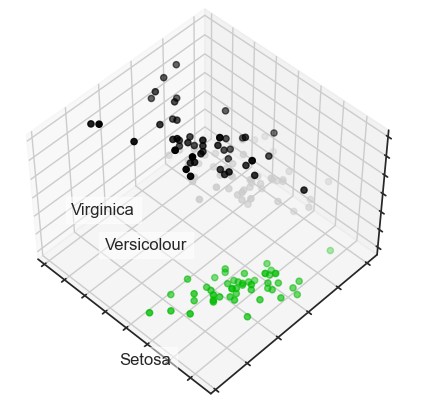

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Let's create a beautiful 3d-plot
fig = plt.figure(figsize=(6, 5))
plt.clf()
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float64)
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr,
           cmap=plt.cm.nipy_spectral)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

El conjunto de datos Iris, es un conjunto de datos popular en aprendizaje automático que contiene mediciones de tres especies diferentes de iris (Setosa, Versicolour y Virginica) con respecto a cuatro características (longitud y ancho de sépalo y pétalo).

Entonces cargamos los datos y luego creamos un gráfico tridimensional (3D) utilizando matplotlib y Axes3D de mpl_toolkits. En este gráfico, vemos que cada punto representa una flor iris y que está ubicado en el espacio tridimensional según sus cuatro características (longitud y ancho de sépalo y pétalo).

Dicho esto, veamos el código:

- Se importan las bibliotecas necesarias y se carga el conjunto de datos Iris utilizando `datasets.load_iris()` de `sklearn.datasets`.

- Se asignan las características a `X` y las etiquetas de clase a `y`.

- Se crea una figura tridimensional (`fig`) con una sola subparcela (`ax`) utilizando `plt.figure()` y `fig.add_subplot()`.

- Se eliminan todos los ejes de la parcela utilizando `plt.cla()`.

- Para cada clase de flor iris, se calcula la media de las características (longitud y ancho de sépalo y pétalo) y se muestra el nombre de la clase en esa ubicación promedio utilizando `ax.text3D()`.

- -Se crea el gráfico de dispersión tridimensional (`sc`) con los puntos de datos (`X[:, 0], X[:, 1], X[:, 2]`) coloreados según la clase (`y_clr`) utilizando `ax.scatter()`.

- Se eliminan las etiquetas de los ejes utilizando `ax.set_xticklabels([])`, `ax.set_yticklabels([])` y `ax.set_zticklabels([])`.

- Finalmente, se muestra el gráfico tridimensional utilizando `plt.show()`.


Ahora veamos cómo PCA mejorará los resultados de un modelo simple que no es capaz de ajustar correctamente todos los datos de entrenamiento:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

# Decision trees with depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.88889


Acá implementamos un clasificador de árbol de decisión para predecir las clases de las flores Iris utilizando el conjunto de datos de Iris. Entonces ajustamos el clasificador a los datos de entrenamiento de Iris, lo evalúamos en el conjunto de prueba y muestramos la precisión del modelo en la consola.

Ahora miraremos el código:

- Se importan las clases necesarias del módulo `sklearn.tree` para el clasificador de árbol de decisión (`DecisionTreeClassifier`), del módulo `sklearn.model_selection` para dividir los datos en conjuntos de entrenamiento y prueba (`train_test_split`), y del módulo `sklearn.metrics` para calcular la precisión y el área bajo la curva ROC (`accuracy_score, roc_auc_score`).

- Se dividen los datos en conjuntos de entrenamiento y prueba utilizando `train_test_split()`. Aquí, el 30% de los datos se utilizarán para pruebas (`test_size=.3`) y se estratificarán según las etiquetas de clase (`stratify=y`) para mantener la misma proporción de clases en ambos conjuntos. El estado aleatorio (`random_state=42`) se establece para reproducibilidad.

- Se instancia un clasificador de árbol de decisión con una profundidad máxima de 2 (`max_depth=2`) y un estado aleatorio para la reproducción (`random_state=42`).

- Se ajusta el clasificador a los datos de entrenamiento utilizando `fit()`.

- Se utilizan las probabilidades de predicción (`predict_proba()`) para hacer predicciones en el conjunto de prueba. Las probabilidades se convierten en etiquetas de clase utilizando `argmax(axis=1)`.

- Se calcula la precisión del modelo utilizando `accuracy_score()` y se imprime en la consola.

Esto lo hicimos sin usar PCA. Entonces intentemos esto nuevamente, pero esta vez, reduzcamos la dimensionalidad a 2 dimensiones:

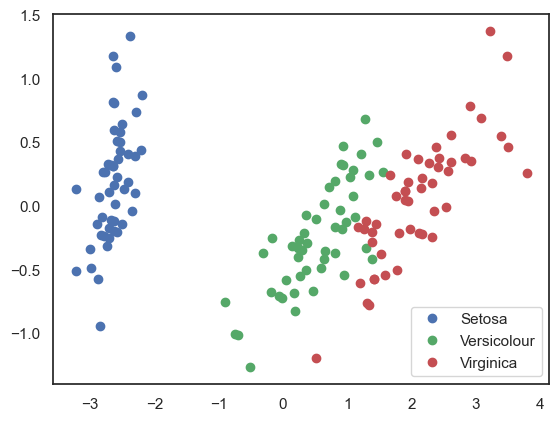

In [ ]:
# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Plotting the results of PCA
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)

- Se importa la clase PCA del módulo `sklearn.decomposition` para realizar el análisis de componentes principales (PCA).

- Se instancia un objeto PCA con `n_components=2`, lo que indica que queremos reducir la dimensionalidad de nuestros datos a dos dimensiones.

- Se centra los datos alrededor de la media utilizando la línea `X_centered = X - X.mean(axis=0)`. Esto es necesario para que PCA funcione correctamente.

- Se ajusta el modelo PCA a los datos centrados utilizando `pca.fit()`.

- Se transforman los datos originales en el nuevo espacio de características de menor dimensión utilizando `pca.transform()`.

- Se trazan los resultados del PCA en un gráfico de dispersión en 2D. Para cada clase de flor Iris, se seleccionan las coordenadas correspondientes en el nuevo espacio de características (`X_pca`) y se trazan como puntos en el plano xy. Cada clase se representa con un color diferente (azul para Setosa, verde para Versicolour y rojo para Virginica).

- Se agrega una leyenda al gráfico para identificar las clases.


Ahora aplicaremos nuevamente el clasificador anterior y evaluaremos los datos:

In [ ]:
# Test-train split and apply PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.91111


Usamos las mismas lineas de código para usar el clasificador que aplicamos anteriormente, solo que en esta ocasión cambiaremos la variable que contenía todas las caracteristicas `X` por la que acabamos de crear `X_pca`. Que contiene el nuevo espacio de caracteriticas `X_pca`, es decir, las caracteristicas reducidas despues de aplicar PCA.

Una vez corremos el codigo. Vemos que la precisión no aumentó significativamente en este caso, pero, con otros conjuntos de datos con un alto número de dimensiones, PCA puede mejorar drásticamente la precisión de los árboles de decisión y otros métodos de conjunto.

Ahora veamos el porcentaje de varianza que puede explicarse por cada uno de los componentes seleccionados.

In [ ]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1,
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
2 component: 5.31% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


- Se utiliza un bucle for para iterar sobre los componentes principales devueltos por PCA.

- Para cada componente principal, se imprime el número de componente y el porcentaje de varianza explicada por ese componente. Esto se calcula como el porcentaje de varianza explicada por el componente principal dividido por la varianza total de los datos originales.

- Se imprime una representación del componente principal como una combinación lineal de las características originales. Para cada componente, se muestra la contribución de cada característica original al componente, multiplicada por su valor correspondiente en el vector de componente principal. Esto nos da una idea de qué características tienen más peso en cada componente principal.

#### Porcentaje de varianza

El porcentaje de varianza explicada nos dice cuánta información de los datos originales está siendo representada por cada componente principal. Cuanto mayor sea el porcentaje de varianza explicada, más información se conserva en ese componente principal.

- El componente principal 1 captura una gran cantidad de información de los datos originales. El 92% de la variabilidad en los datos originales está representada por este componente. En otras palabras, casi toda la información relevante de los datos está contenida en este componente. Por lo tanto, este componente es altamente informativo y probablemente será crucial para entender y modelar los datos.

- El componente principal 2 captura una cantidad mucho menor de información de los datos originales en comparación con el primer componente. Solo el 5% de la variabilidad en los datos originales está representada por este componente principal. Aunque este componente aún contiene información útil, su contribución es mucho menor en comparación con el otro componente. Es posible que este componente capture ruido o variabilidad menos importante en los datos.

### Ejemplo 2

#### Conjunto de datos de números escritos a mano (Handwritten numbers dataset)

Veamos el conjunto de datos de números escritos a mano

In [ ]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

1797


En las lineas anteriores:

- Cargamos el conjunto de datos de dígitos escritos a mano, que contiene imágenes de dígitos del 0 al 9 escritos a mano, junto con sus etiquetas correspondientes. Los datos están almacenados en un objeto llamado digits.

- Extraemos las características (píxeles) de las imágenes de los dígitos y las asigna a la variable X. Cada fila de X representa una imagen de un dígito, donde cada valor en la fila representa la intensidad de un píxel en la imagen.

- Esta línea extrae las etiquetas de los dígitos y las asigna a la variable y. Cada valor en y corresponde al dígito representado en la imagen correspondiente en X.


Continuemos visualizando nuestros datos. Obtendremos los 10 primeros números, estos están representados por matrices de 8 x 8 con la intensidad de color de cada píxel. Cada matriz se aplana en un vector de 64 números, por lo que obtenemos la versión característica de los datos.

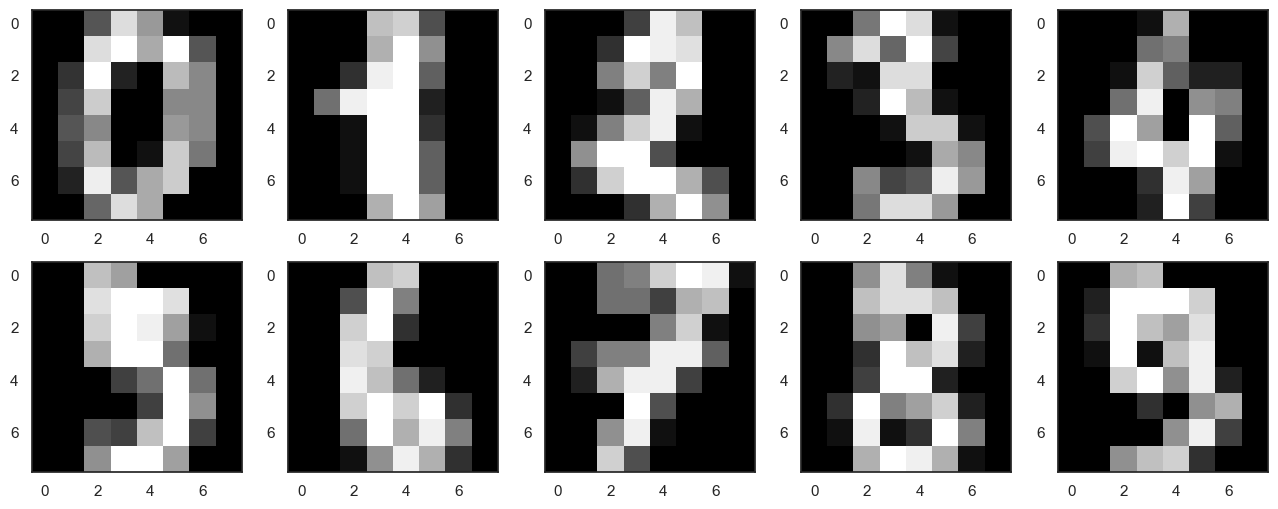

In [ ]:
# f, axes = plt.subplots(5, 2, sharey=True, figsize=(16,6))
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')

- Se crea una figura de matplotlib con un tamaño específico de 16x6 pulgadas para acomodar las visualizaciones de las imágenes.

- Se utiliza un bucle `for` para iterar sobre los primeros 10 dígitos en el conjunto de datos.

- Para cada iteración del bucle, se crea un subtrazado en la figura. Estos subtrazados se organizan en una cuadrícula de 2 filas y 5 columnas, lo que permite mostrar las 10 imágenes en una matriz de 2x5.

- Se muestra cada imagen de dígito en su subtrazado correspondiente utilizando la función `imshow()` de matplotlib. La imagen se recupera del conjunto de datos `X`, que contiene los píxeles de la imagen, y se visualiza en escala de grises utilizando el mapa de colores `'gray'`.


Nuestros datos tienen 64 dimensiones, pero vamos a reducirlos a solo 2 y veremos que, incluso con solo 2 dimensiones, podemos ver claramente que los dígitos se separan en grupos.

Projecting 64-dimensional data to 2D


C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_10900\2187305149.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


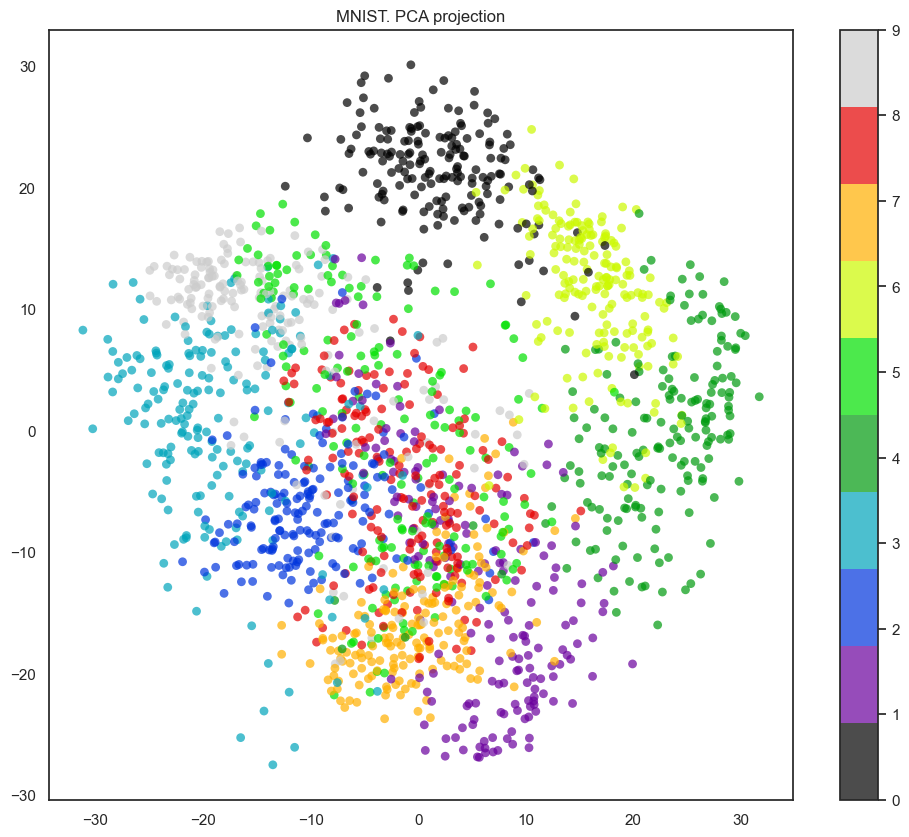

In [ ]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

Aquí calculamos la proyección PCA de los datos de dígitos escritos a mano en un espacio bidimensional y visualizamos los resultados utilizando un diagrama de dispersión coloreado según las etiquetas de clase. Viendo un poco más del código tenemos:

- Se inicializa una instancia de la clase PCA del módulo decomposition de `scikit-learn` con `n_components=2`, lo que significa que queremos reducir la dimensionalidad de los datos a solo 2 dimensiones.

- Se aplica el método `fit_transform()` a los datos originales X, lo que realiza dos pasos en uno:

    - Ajusta el modelo PCA a los datos, calculando los componentes principales y otros atributos internos del modelo.
    - Transforma los datos originales a las nuevas dimensiones especificadas (en este caso, 2 dimensiones).

- Se imprime un mensaje indicando que se están proyectando los datos de dígitos de su dimensión original a 2D.

- Se crea una figura de matplotlib con un tamaño de 12x10 pulgadas para visualizar el resultado de la proyección.

- Se utiliza la función `scatter()` de matplotlib para crear un diagrama de dispersión de los datos proyectados. Los argumentos de esta función son:

    - `X_reduced[:, 0]` y `X_reduced[:, 1]`: Las coordenadas X e Y de los puntos proyectados en el espacio bidimensional.
    - `c=y`: El color de cada punto se asigna según las etiquetas de clase `y`.
    - `edgecolor='none'`: Se especifica que no haya bordes alrededor de los puntos.
    - `alpha=0.7`: Se establece la transparencia de los puntos en 0.7 para que los puntos superpuestos sean más visibles.
    - `s=40`: Tamaño de los puntos en el gráfico.
    - `cmap=plt.cm.get_cmap('nipy_spectral', 10)`: Selecciona el mapa de colores `'nipy_spectral'` con 10 colores, que se utilizará para asignar colores a las diferentes clases. El argumento 10 especifica el número de clases.

- Se agrega una barra de color al gráfico para mostrar la correspondencia entre los colores y las etiquetas de clase.

- Por último, queda poner el título del gráfico como `'MNIST. Proyección PCA'`.

En efecto, con t-SNE, la imagen se ve mejor ya que PCA tiene una restricción lineal mientras que t-SNE no la tiene. Sin embargo, incluso con un conjunto de datos tan pequeño, el algoritmo t-SNE tarda significativamente más tiempo en completarse que PCA.

CPU times: total: 24.6 s
Wall time: 14.8 s


<timed exec>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


Text(0.5, 1.0, 'MNIST. t-SNE projection')

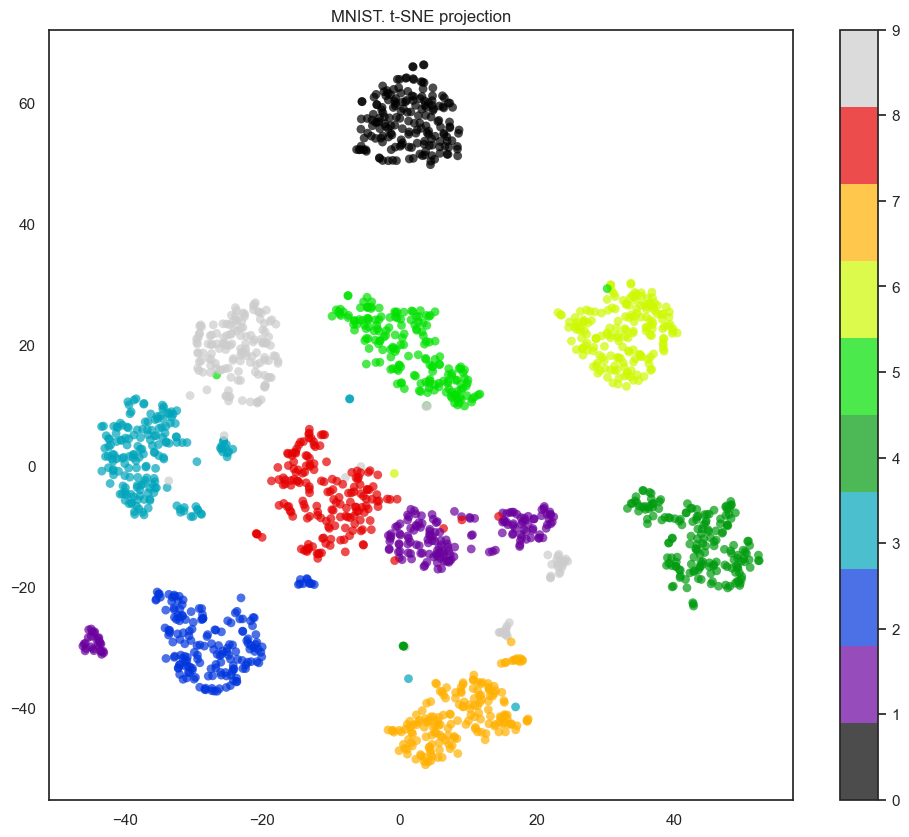

In [ ]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

-  `from sklearn.manifold import TSNE` : Importa la clase `TSNE` del módulo `manifold` del paquete scikit-learn. t-SNE (t-distributed Stochastic Neighbor Embedding) es otro algoritmo de reducción de dimensionalidad no lineal, útil para visualizar datos de alta dimensión en un espacio de menor dimensión.

- `tsne = TSNE(random_state=17)`: Crea una instancia del objeto TSNE. El argumento `random_state=17` se utiliza para inicializar el generador de números aleatorios y garantizar la reproducibilidad de los resultados.

- `X_tsne = tsne.fit_transform(X)`: Aplica el método `fit_transform()` de TSNE a los datos originales `X`. Este método ajusta el modelo TSNE a los datos y luego los transforma a un nuevo espacio de menor dimensión.

- `plt.figure(figsize=(12,10))`: Crea una nueva figura de matplotlib con un tamaño de 12x10 pulgadas.

- `plt.scatter(...)`: Crea un diagrama de dispersión de los datos proyectados por t-SNE. Los argumentos son similares a los explicados anteriormente para PCA.

- `plt.colorbar()`: Agrega una barra de color al gráfico para mostrar la correspondencia entre los colores y las etiquetas de clase.

- `plt.title('MNIST. Proyección t-SNE')`: Establece el título del gráfico como `'MNIST. Proyección t-SNE'`.


En la práctica, elegiríamos el número de componentes principales de manera que podamos explicar el 90% de la dispersión inicial de los datos (a través de `explained_variance_ratio`). Aquí, eso significa retener 21 componentes principales; por lo tanto, reducimos la dimensionalidad de 64 características a 21.

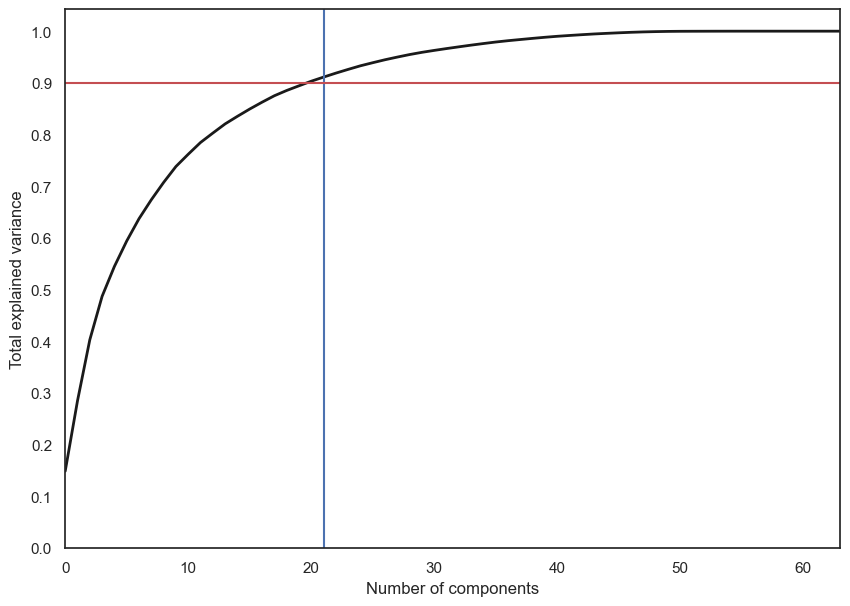

In [ ]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

- `pca = decomposition.PCA().fit(X)`: Se crea una instancia de la clase PCA y se ajusta a los datos `X`. No se especifica el número de componentes a mantener, por lo que PCA conservará todas las componentes.

- `plt.figure(figsize=(10,7))`: Se crea una nueva figura de matplotlib con un tamaño de 10x7 pulgadas.

- `plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)`: Se traza la suma acumulada de la varianza explicada por cada componente principal en función del número de componentes. `np.cumsum(pca.explained_variance_ratio_)` calcula la suma acumulada de las proporciones de varianza explicada, y `plt.plot()` traza estos valores en el gráfico. El argumento `color='k'` establece el color en negro y `lw=2` establece el grosor de la línea en 2 puntos.


Las demas lineas de código son mas conocidas porque respectan al aspecto del grafico como tal, pero para mayor comprensión del codigo:

- `plt.xlabel('Number of components')`: Establece el texto del eje x como 'Número de componentes'.

- `plt.ylabel('Total explained variance')`: Establece el texto del eje y como 'Varianza explicada total'.

- `plt.xlim(0, 63)`: Establece los límites del eje x entre 0 y 63. Este rango representa el número total de componentes principales en el conjunto de datos.

- `plt.yticks(np.arange(0, 1.1, 0.1))`: Establece las marcas del eje y de 0 a 1.0 con un paso de 0.1.

- `plt.axvline(21, c='b')`: Agrega una línea vertical en x=21 (número de componentes) en color azul.

- `plt.axhline(0.9, c='r')`: Agrega una línea horizontal en y=0.9 (90% de varianza explicada) en color rojo.

- `plt.show()`: Muestra el gráfico.

### ¡Recordemos!

#### Veamos el concepto general de manera más simple:

Digamos que tenemos que representar estos datos en un espacio de 10 dimensiones.... Esto, es imposible de visualizar.

Aquí es donde entra en juego PCA (Análisis de Componentes Principales). PCA nos permite reducir la dimensionalidad de nuestros datos, es decir, transforma nuestros datos de un espacio de alta dimensión a un espacio de baja dimensión mientras trata de mantener la mayor cantidad posible de información.

Entonces, en lugar de tratar de visualizar nuestros datos en un espacio de 10 dimensiones, podríamos usar PCA para reducir la dimensión a solo 2 o 3, lo que nos permitiría visualizar nuestros datos de una manera mucho más comprensible.

 > Hacemos PCA para reducir la complejidad de nuestros datos y poder entenderlos y visualizarlos de manera más fácil.

### Ejemplo 3

Somos científicos de datos en una empresa de análisis de riesgos financieros. Nos han proporcionado un conjunto de datos que contiene información sobre transacciones financieras, cada una representada por una gran cantidad de características. Nuestro objetivo es comprender y visualizar las relaciones entre estas características para identificar posibles patrones de fraude o comportamiento anómalo en las transacciones.

#### Creación de datos

Generaremos un conjunto de datos sintéticos que simulará transacciones financieras. Utilizaremos la función `make_classification` de scikit-learn para crear un conjunto de datos con características aleatorias que representan diferentes aspectos de las transacciones. Este conjunto de datos contendrá un número específico de muestras (transacciones) y características (atributos).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import decomposition

# Generación de datos sintéticos
X, y = datasets.make_classification(n_samples=1000, n_features=12, n_classes=3, n_clusters_per_class=1, random_state=42)

# Impresión de la forma de los datos (dimensiones)
print("Dimensiones de los datos:", X.shape)

Dimensiones de los datos: (1000, 12)


De las lineas anteriores podemos explicar:

- Importamos la función `make_classification` del módulo `sklearn.datasets`, que nos permite generar conjuntos de datos sintéticos con características específicas.

- Definimos el número de muestras (`n_samples`) y el número de características (`n_features`) que queremos en nuestro conjunto de datos.

- Utilizamos la función make_classification para generar el conjunto de datos sintético `X`. Especificamos que queremos 10 características informativas, 5 características redundantes y 2 clases para simular transacciones legítimas y fraudulentas.

- Finalmente, imprimimos las dimensiones del conjunto de datos generado para confirmar que tiene el formato correcto. En este caso, deberíamos obtener un conjunto de datos con 1000 transacciones y 20 características cada una.


#### Aplicación de PCA

Aplicaremos el Análisis de Componentes Principales (PCA) al conjunto de datos sintético generado anteriormente. PCA nos permitirá reducir la dimensionalidad del conjunto de datos al proyectarlo en un espacio de menor dimensión mientras conserva la mayor cantidad posible de la variabilidad de los datos.

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA al conjunto de datos
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Dimensión del conjunto de datos después de PCA:", X_pca.shape)


Dimensión del conjunto de datos después de PCA: (1000, 2)


- Importamos la clase PCA del módulo `sklearn.decomposition`.

- Creamos una instancia de PCA con `n_components=2`, lo que indica que queremos proyectar los datos en un espacio de dos dimensiones.

- Utilizamos el método `fit_transform` para ajustar el modelo PCA al conjunto de datos X y transformarlo en el nuevo espacio de características representado por `X_pca`.

- Imprimimos la dimensión del conjunto de datos después de aplicar PCA para confirmar que ahora tiene solo dos dimensiones.

### Visualizar el conjunto de datos después de PCA


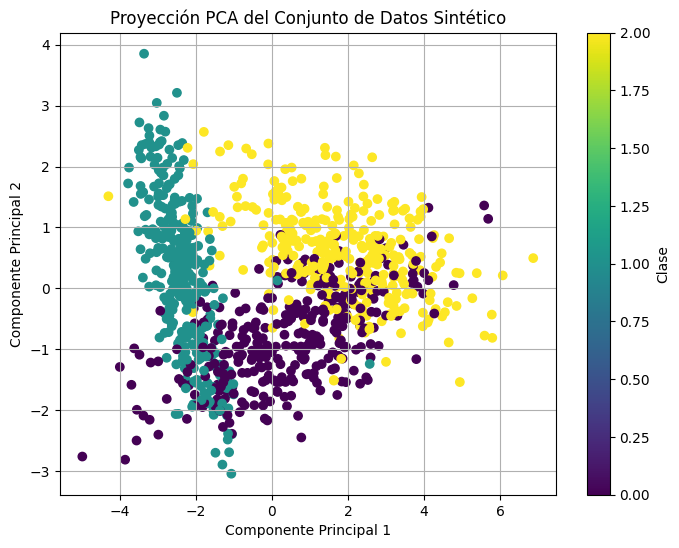

In [ ]:
import matplotlib.pyplot as plt

# Visualizar el conjunto de datos después de PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('Proyección PCA del Conjunto de Datos Sintético')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clase')
plt.grid(True)
plt.show()


- Importamos `matplotlib.pyplot` como plt para visualizar los datos.

- Creamos una figura de tamaño 8x6 utilizando `plt.figure(figsize=(8, 6))`.

- Utilizamos `plt.scatter` para trazar los puntos del conjunto de datos después de PCA. Pasamos las coordenadas `X_pca[:, 0] `como la posición x, `X_pca[:, 1]` como la posición y, y y como el color de los puntos (indicando las clases).

- Agregamos un título al gráfico con `plt.title`.

- Etiquetamos los ejes x e y con `plt.xlabel` y `plt.ylabel` respectivamente.

- Añadimos una barra de color con `plt.colorbar` para mostrar la correspondencia entre los colores y las clases.

- Finalmente, mostramos el gráfico con `plt.show()`.

Esto proporciona una representación visual de los datos sintéticos en un espacio bidimensional después de aplicar PCA, lo que permite una mejor comprensión de la distribución de los datos y su estructura subyacente.

In [ ]:
# Obtener el porcentaje de varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Imprimir el porcentaje de varianza explicada por cada componente
for i, variance_ratio in enumerate(explained_variance_ratio):
    print("Componente Principal {}: {:.2f}% de la varianza total".format(i+1, variance_ratio*100))



Componente Principal 1: 35.55% de la varianza total
Componente Principal 2: 8.67% de la varianza total



Los resultados del PCA, incluyendo los porcentajes de varianza explicada por cada componente principal, nos proporcionan información importante sobre cómo los datos se distribuyen en el espacio transformado. En este caso, cuando observamos que el primer componente principal explica el 35% de la varianza y el segundo componente principal solo explica el 8%, podemos inferir varias cosas:

- Importancia relativa de los componentes: El primer componente principal captura la mayor parte de la variabilidad en los datos, lo que indica que las direcciones de máxima variabilidad están más alineadas con el primer componente. Por otro lado, el segundo componente captura una cantidad relativamente pequeña de variabilidad adicional en comparación con el primero.

- Características dominantes: El primer componente principal probablemente está relacionado con las características más prominentes o discriminativas en los datos, mientras que el segundo componente captura variaciones más sutiles o menos distintivas.

- Posibles mejoras: El hecho de que el segundo componente explique una cantidad relativamente baja de varianza sugiere que podría haber margen para mejorar la representación de los datos. Esto podría lograrse considerando más componentes principales para capturar una mayor proporción de la variabilidad total en los datos, lo que podría llevar a una representación más completa y rica de la estructura subyacente en los datos.

En ejemplo al tener datos sinteticos no normalizamos los datos, es posible que por este motivo tengamos valores reducidos al calcular el porcentaje de varianza de cada componente. Entonces si queremos mejorar el resultado, una forma de hacerlo es estandarizando o normalizando los datos antes de aplicar PCA, lo que puede ayudar a igualar la escala de las características y mejorar la capacidad del PCA para capturar la varianza en todas las dimensiones. Veamos todos los bloques de codigo anteiores de manera mas compacta y agregando la lineas de normalizado:

Dimensiones de los datos: (1000, 12)
Dimensión del conjunto de datos después de PCA: (1000, 2)


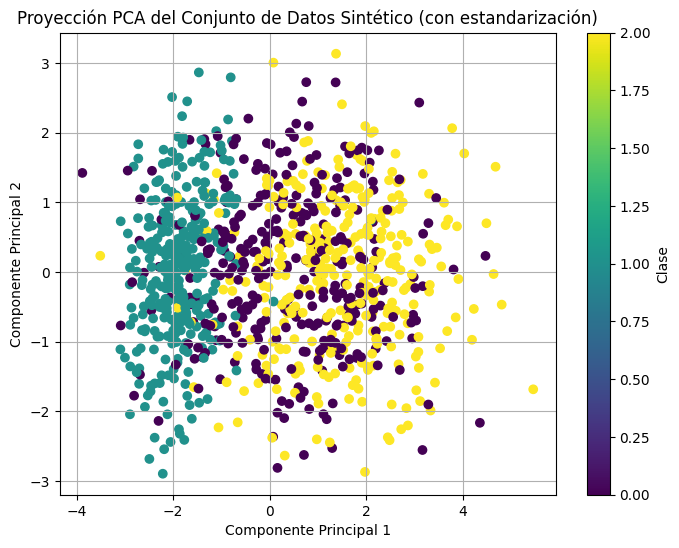

Porcentaje de varianza explicada por cada componente principal:
Componente 1: 27.28%
Componente 2: 9.41%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Generación de datos sintéticos
X, y = datasets.make_classification(n_samples=1000, n_features=12, n_classes=3, n_clusters_per_class=1, random_state=42)

# Impresión de la forma de los datos (dimensiones)
print("Dimensiones de los datos:", X.shape)

# Bloque 2: Aplicación de PCA con estandarización de datos
from sklearn.decomposition import PCA

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA al conjunto de datos estandarizado
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Dimensión del conjunto de datos después de PCA:", X_pca.shape)

# Bloque 3: Visualización del conjunto de datos después de PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('Proyección PCA del Conjunto de Datos Sintético (con estandarización)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clase')
plt.grid(True)
plt.show()

# Bloque 4: Porcentaje de varianza explicada por cada componente principal
print("Porcentaje de varianza explicada por cada componente principal:")
for i, explained_variance_ratio in enumerate(pca.explained_variance_ratio_):
    print("Componente {}: {:.2f}%".format(i+1, explained_variance_ratio * 100))


Vemos que los datos graficamente ya no son tan dispersos y que podría ser un buen indicio de que mejoraremos los resultados, sin embargo, cuando imprimimos el porcentaje de varianza de cada componente notamos que no mejoró el resultado. Por esta razón podemos descartar que el fallo estaba en la normalizacion y lo siguiente que haremos es aumentar el numero de componentes principales.

In [ ]:


# Paso 2: Aplicar PCA con más componentes
pca = PCA(n_components=6)  # Aumentamos el número de componentes
X_pca = pca.fit_transform(X_scaled)

# Paso 3: Mostrar porcentajes de varianza explicada
print("Porcentaje de varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)
print("Porcentaje de varianza total explicada por los 6 componentes:", sum(pca.explained_variance_ratio_))


Porcentaje de varianza explicada por cada componente:
[0.27277541 0.09410569 0.09151217 0.08464023 0.08442829 0.08383276]
Porcentaje de varianza total explicada por los 6 componentes: 0.7112945425780985


Hemos realizado lo siguiente:

- Con los datos estandarizados que traiamos, aumentamos el número de componentes principales a 6 en el objeto PCA.

- Mostramos los porcentajes de varianza explicada por cada componente y la suma total de estos porcentajes.

Al aumentar el número de componentes principales y estandarizar los datos, mejoramos la capacidad de PCA para capturar la varianza en los datos y obtener una mejor representación en un espacio de dimensionalidad reducida.

Un porcentaje de varianza total del 71% significa que los 6 componentes principales que hemos seleccionado pueden explicar el 71% de la variabilidad total en los datos. En otras palabras, al reducir la dimensionalidad de los datos de 12 a 6 dimensiones, aún podemos retener una cantidad significativa de la estructura de los datos originales.

Este resultado indica que los 6 componentes principales capturan una cantidad sustancial de información de los datos originales. Sin embargo, es importante tener en cuenta que aún estamos perdiendo aproximadamente el 29% de la información original al reducir la dimensionalidad. La elección del número de componentes principales es un compromiso entre la cantidad de información retenida y la dimensionalidad reducida del conjunto de datos. En algunos casos, puede ser necesario ajustar este número para satisfacer las necesidades específicas del problema.

## Actividad

#### Problema:
Tenemos un conjunto de datos sintéticos que representan el rendimiento académico de estudiantes en varias asignaturas. Cada estudiante tiene un conjunto de calificaciones en diferentes materias. Queremos aplicar PCA para reducir la dimensionalidad de estos datos y visualizar cómo se agrupan los estudiantes en un espacio bidimensional basado en su rendimiento académico.

#### Datos:
Generaremos un conjunto de datos sintéticos que representan las calificaciones de los estudiantes en 8 asignaturas diferentes. Cada fila representará a un estudiante y cada columna representará una materia. Utilizaremos un generador de datos sintéticos para crear este conjunto de datos sin etiquetas.


In [ ]:
# Datos

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generación de datos sintéticos
np.random.seed(0)
n_students = 100
n_subjects = 8

# Crear datos sintéticos de calificaciones de estudiantes
grades = np.random.randint(0, 101, size=(n_students, n_subjects))

#### Preguntas:

1. ¿Cuántas dimensiones tiene el conjunto de datos inicial?
2. Después de aplicar PCA, ¿cuántas dimensiones tiene el conjunto de datos reducido?
3. ¿Cuál es el porcentaje de varianza explicada por cada componente principal?
4. ¿Cómo se agrupan los estudiantes en un espacio bidimensional después de la reducción de dimensionalidad?
5. ¿Los datos explican al menos el 60% de los datos originales? ¿Cuántos componentes principales son suficientes para esto?

#### Solución

Dimensiones del conjunto de datos inicial: (100, 8)
Dimensiones del conjunto de datos reducido: (100, 2)
Porcentaje de varianza explicada por cada componente principal:
[0.17492833 0.15186722]


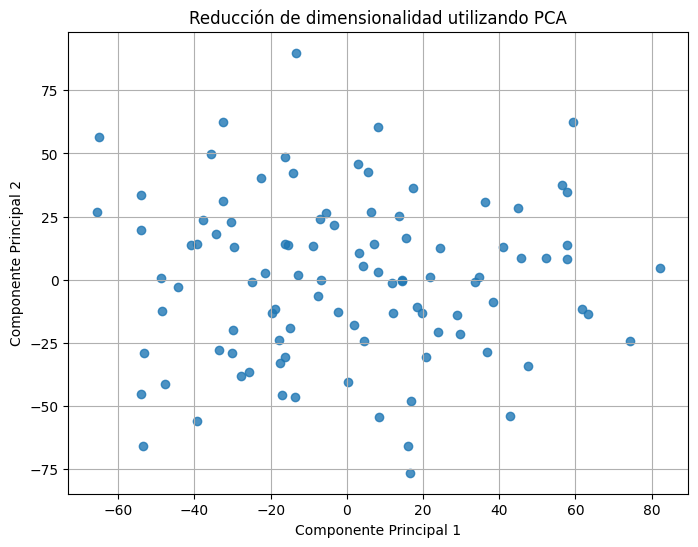

Porcentaje de varianza total explicada por el total de los componentes: 60.553772376041714 %


In [ ]:
# Pregunta 1: Dimensiones del conjunto de datos inicial
print("Dimensiones del conjunto de datos inicial:", grades.shape)

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
grades_reduced = pca.fit_transform(grades)

# Pregunta 2: Dimensiones del conjunto de datos reducido
print("Dimensiones del conjunto de datos reducido:", grades_reduced.shape)

# Pregunta 3: Porcentaje de varianza explicada por cada componente principal
print("Porcentaje de varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Pregunta 4: Visualizar los datos reducidos en un espacio bidimensional
plt.figure(figsize=(8, 6))
plt.scatter(grades_reduced[:, 0], grades_reduced[:, 1], alpha=0.8)
plt.title('Reducción de dimensionalidad utilizando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Pregunta 5: Aumento de componentes
pca = PCA(n_components=4)
grades_reduced = pca.fit_transform(grades)
print("Porcentaje de varianza total explicada por el total de los componentes:", sum(pca.explained_variance_ratio_)*100, "%")